<a href="https://colab.research.google.com/github/DeepakGhume/Amazon-Clone/blob/main/codes%20(FASTAI)/ENDOSCOPY%20GI%20FASTAI%20RESNET16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Check if fastai and pytorch are installed
!pip list | grep -e fastai -e torch -e torchvision

# If not, uncomment this line and run to install them
!pip install torch torchvision fastai

fastai                             1.0.59              
pytorch-ignite                     0.2.1               
pytorch-pretrained-bert            0.6.2               
pytorch-transformers               1.1.0               
torch                              1.3.0               
torchaudio                         0.4.0a0+ce1f8aa     
torchtext                          0.4.0               
torchvision                        0.4.1a0+d94043a     


In [ ]:
%%time

import os
labels = []
labels = os.listdir("/kaggle/input/kvasir-dataset/kvasir-dataset-v2/")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

del labels[1]
labelsnew = labels
print(labels)
print()

for label in labels:
    print("{}, {} files".format(label, len(os.listdir("/kaggle/input/kvasir-dataset/kvasir-dataset-v2/"+label))))
print()

No. of labels: 9
-----------------
['polyps', 'ulcerative-colitis', 'dyed-resection-margins', 'dyed-lifted-polyps', 'normal-z-line', 'normal-pylorus', 'esophagitis', 'normal-cecum']

polyps, 1000 files
ulcerative-colitis, 1000 files
dyed-resection-margins, 1000 files
dyed-lifted-polyps, 1000 files
normal-z-line, 1000 files
normal-pylorus, 1000 files
esophagitis, 1000 files
normal-cecum, 1000 files

CPU times: user 0 ns, sys: 8 ms, total: 8 ms
Wall time: 7.65 ms


Populating the interactive namespace from numpy and matplotlib


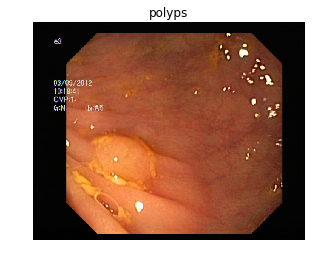

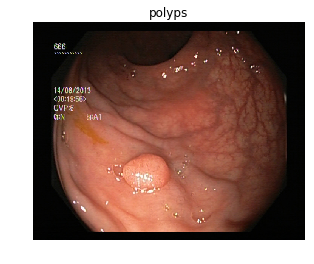

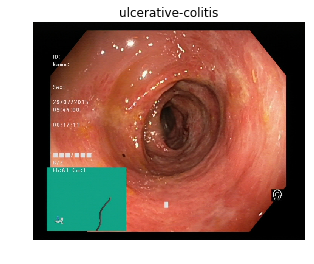

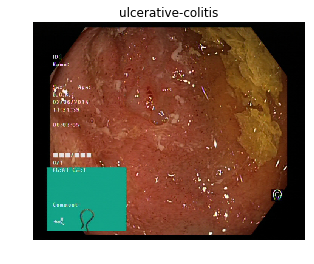

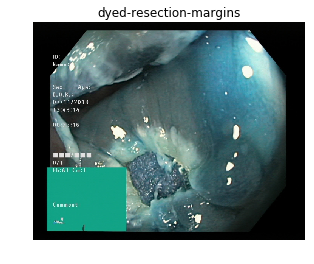

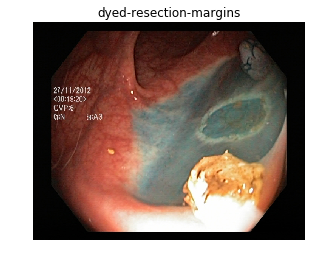

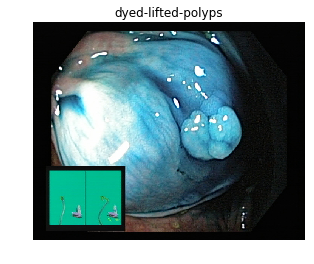

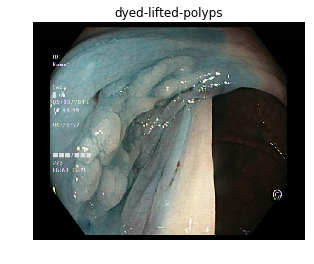

CPU times: user 1.26 s, sys: 32 ms, total: 1.3 s
Wall time: 1.32 s


In [ ]:
%%time
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(4):
    for j in range(2):
        image_name = np.random.choice(os.listdir("/kaggle/input/kvasir-dataset/kvasir-dataset-v2/" + labels[i]))
        img = mpimg.imread(os.path.join('/kaggle/input/kvasir-dataset/kvasir-dataset-v2/',labels[i],image_name))
        plt.imshow(img)
        plt.title(labels[i])
        plt.axis('off')
        plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use('ggplot')

from fastai import *
from fastai.vision import *
from fastai.core import *
from fastai.metrics import accuracy
from fastai.callbacks import *


In [ ]:
path = "/kaggle/input/kvasir-dataset/kvasir-dataset-v2/"
size = 128
bs = 64

In [ ]:
%%time
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True), valid_pct=0.2, size=size, bs=bs)

CPU times: user 2.61 s, sys: 436 ms, total: 3.05 s
Wall time: 4.55 s


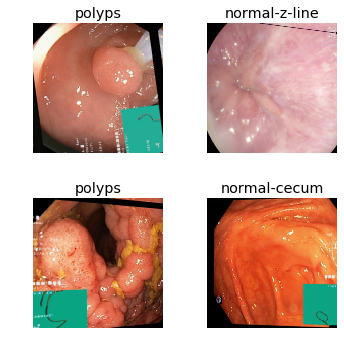

In [ ]:
data.show_batch(rows=2, figsize=(5,5))

In [ ]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (12800 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
polyps,polyps,polyps,polyps,polyps
Path: /kaggle/input/kvasir-dataset/kvasir-dataset-v2;

Valid: LabelList (3200 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
dyed-resection-margins,polyps,ulcerative-colitis,dyed-resection-margins,polyps
Path: /kaggle/input/kvasir-dataset/kvasir-dataset-v2;

Test: None

In [ ]:
data.classes

['dyed-lifted-polyps',
 'dyed-resection-margins',
 'esophagitis',
 'normal-cecum',
 'normal-pylorus',
 'normal-z-line',
 'polyps',
 'ulcerative-colitis']

In [ ]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 175MB/s] 


In [ ]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learner.model_dir='/kaggle/working/'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-03
Min loss divided by 10: 1.20E-02
CPU times: user 3.72 s, sys: 976 ms, total: 4.7 s
Wall time: 2min 41s


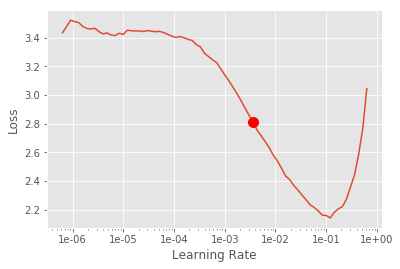

In [ ]:
%%time
learner.lr_find()
learner.recorder.plot(suggestion=True)

In [ ]:
min_grad_lr = learner.recorder.min_grad_lr
min_grad_lr

0.00363078054770101

epoch,train_loss,valid_loss,accuracy,time
0,0.785123,0.467277,0.816250,07:36
1,0.547010,0.415512,0.835312,07:25
2,0.484615,0.477528,0.819375,07:19
3,0.399651,0.308478,0.890625,07:18
4,0.353982,0.334052,0.877187,07:19
5,0.334630,0.256540,0.895625,07:19
6,0.296642,0.266337,0.901875,07:18
7,0.260083,0.228761,0.914375,07:19
8,0.243092,0.222208,0.917500,07:20
9,0.229601,0.209446,0.919375,07:20


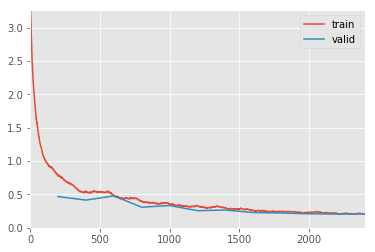

CPU times: user 1min 36s, sys: 22.7 s, total: 1min 59s
Wall time: 1h 28min 16s


In [ ]:
%%time
learner.fit_one_cycle(12, max_lr=slice(1e-3, 1e-2))

In [ ]:
learner.model_dir='/kaggle/working/'

In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('esophagitis', 'normal-z-line', 81),
 ('normal-z-line', 'esophagitis', 40),
 ('dyed-lifted-polyps', 'dyed-resection-margins', 37),
 ('dyed-resection-margins', 'dyed-lifted-polyps', 28),
 ('polyps', 'ulcerative-colitis', 19),
 ('polyps', 'normal-cecum', 11),
 ('dyed-lifted-polyps', 'polyps', 5),
 ('normal-cecum', 'polyps', 4),
 ('normal-cecum', 'ulcerative-colitis', 4),
 ('ulcerative-colitis', 'normal-cecum', 4),
 ('polyps', 'normal-pylorus', 3),
 ('ulcerative-colitis', 'polyps', 3),
 ('normal-pylorus', 'polyps', 2),
 ('polyps', 'dyed-lifted-polyps', 2)]

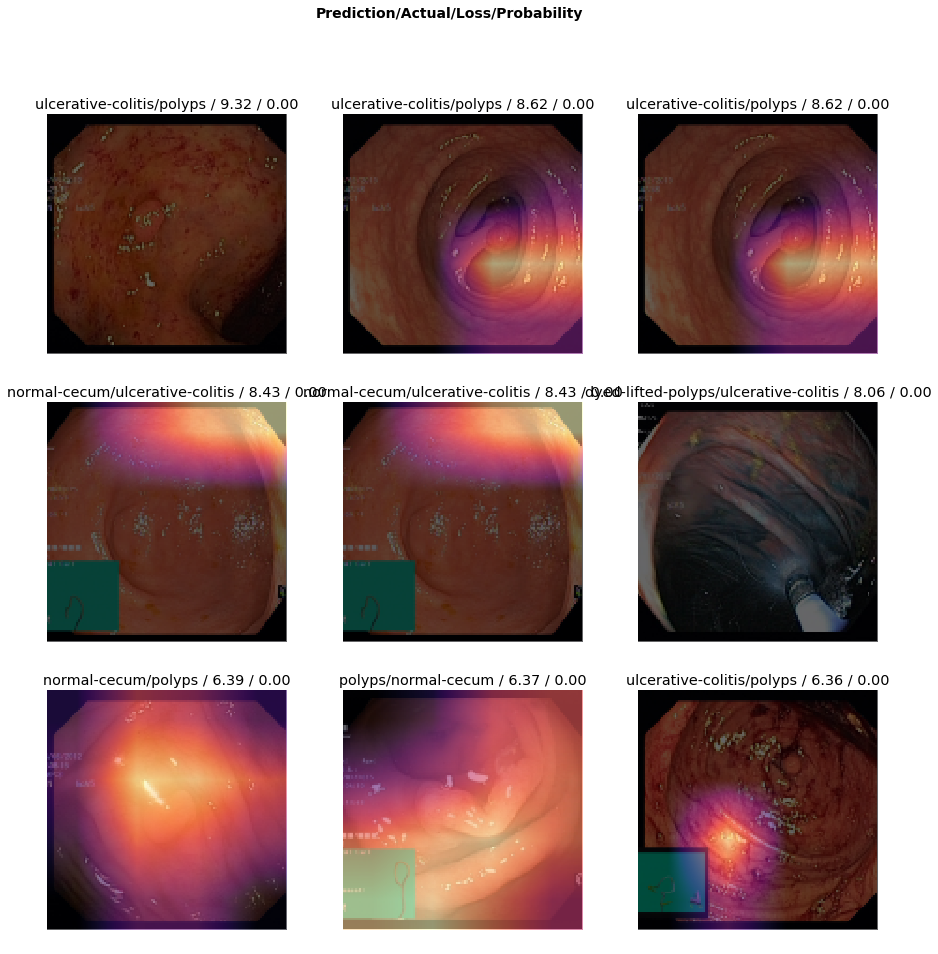

In [ ]:
interpreter.plot_top_losses(9, figsize=(15,15), heatmap = True)

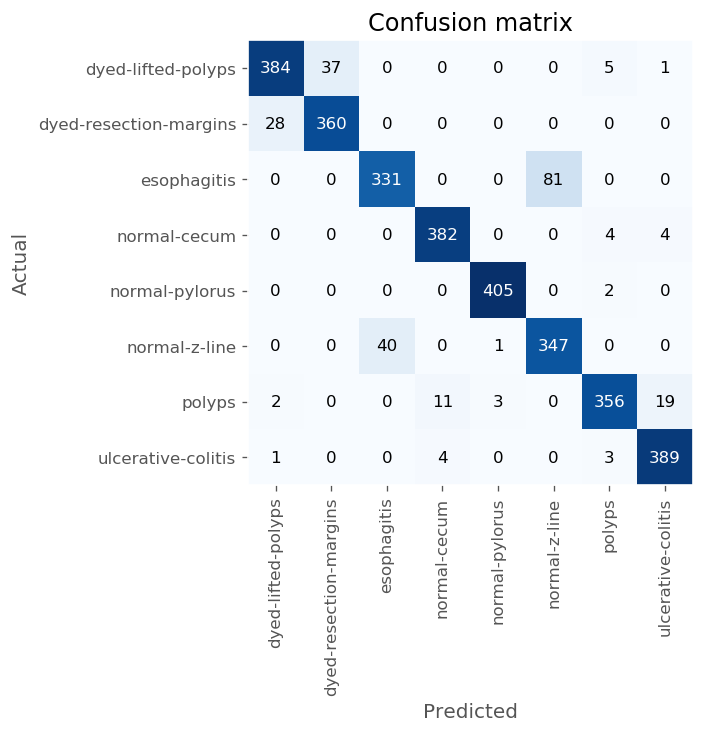

In [ ]:
interpreter.plot_confusion_matrix(figsize=(6,6), dpi=120)

In [ ]:
learner.save('/kaggle/working/Gastro_endoscopy_model_fastai-resnet18-stage1')

learner.export('/kaggle/working/Gastro_endoscopy_model_fastai_stage1.pkl')

epoch,train_loss,valid_loss,accuracy,time
0,0.321920,0.278252,0.900000,06:37
1,0.337757,1.193259,0.702500,06:36
2,0.393316,0.615184,0.818438,06:39
3,0.407862,0.659506,0.783750,06:42
4,0.383366,0.350561,0.860625,06:40
5,0.362033,0.366947,0.854688,06:44
6,0.312512,0.315482,0.869687,06:50
7,0.293717,0.289536,0.890938,06:53
8,0.261442,0.231251,0.905000,06:55
9,0.219699,0.196510,0.921562,06:59


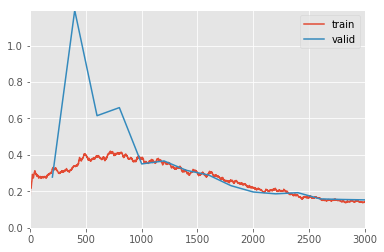

CPU times: user 2min 23s, sys: 30.9 s, total: 2min 54s
Wall time: 1h 41min 45s


In [ ]:
%%time

learner.unfreeze()
learner.fit_one_cycle(15, callbacks=[SaveModelCallback(learner, every='epoch', monitor='accuracy', name='Gastro_endoscopy_model-epoch')], max_lr=slice(1e-3, 1e-2))

learner.export('/kaggle/working/Gastro_endoscopy_model_fastai_stage2.pkl')

epoch,train_loss,valid_loss,accuracy,time
0,0.156353,0.150439,0.942813,06:44
1,0.138713,0.154963,0.940313,06:41
2,0.154660,0.179791,0.932187,06:40
3,0.173083,0.169978,0.935000,06:38
4,0.182487,0.226217,0.917188,06:39
5,0.228138,0.256961,0.912188,06:39
6,0.247476,0.232496,0.905625,06:39
7,0.267439,0.264110,0.898125,06:40
8,0.264340,0.232737,0.917500,06:39
9,0.255417,0.214315,0.918437,06:39


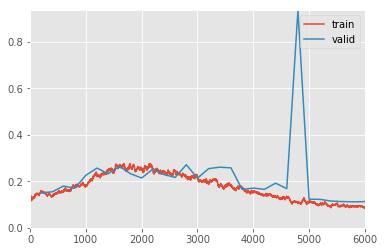

Better model found at epoch 0 with accuracy value: 0.9428125023841858.
Epoch 3: reducing lr to 0.0008732977494397469
Epoch 6: reducing lr to 0.0017754026653942193
Epoch 9: reducing lr to 0.001988830870901824
Epoch 12: reducing lr to 0.0018262394693608981
Epoch 15: reducing lr to 0.0015000020000000003
Epoch 18: reducing lr to 0.0010747337946660502
Epoch 21: reducing lr to 0.0006346644369977026
Better model found at epoch 23 with accuracy value: 0.9478124976158142.
Better model found at epoch 24 with accuracy value: 0.9540625214576721.
Better model found at epoch 26 with accuracy value: 0.9549999833106995.
Better model found at epoch 27 with accuracy value: 0.9559375047683716.
Better model found at epoch 28 with accuracy value: 0.9574999809265137.


In [ ]:
learner.fit_one_cycle(30, max_lr=slice(1e-3, 1e-2), callbacks=[SaveModelCallback(learner, every='improvement', monitor='accuracy', name='Gastro_endoscopy_model-2xepoch'),
                                                               ReduceLROnPlateauCallback(learner, monitor = 'valid_loss', mode = 'auto', patience = 2, factor = 0.2, min_delta = 0.0001, min_lr = 0.001)])

learner.export('/kaggle/working/Gastro_endoscopy_model_fastai_stage3.pkl')

learner.save('/kaggle/working/Gastro_endoscopy_model_fastai-resnet18-finalstage')

In [ ]:
interpreter = ClassificationInterpretation.from_learner(learner)
interpreter.most_confused(min_val=2)

[('esophagitis', 'normal-z-line', 58),
 ('normal-z-line', 'esophagitis', 31),
 ('dyed-lifted-polyps', 'dyed-resection-margins', 9),
 ('dyed-resection-margins', 'dyed-lifted-polyps', 8),
 ('polyps', 'ulcerative-colitis', 8),
 ('ulcerative-colitis', 'polyps', 6),
 ('ulcerative-colitis', 'normal-cecum', 3),
 ('dyed-lifted-polyps', 'polyps', 2),
 ('normal-cecum', 'polyps', 2),
 ('normal-pylorus', 'ulcerative-colitis', 2),
 ('polyps', 'normal-cecum', 2)]

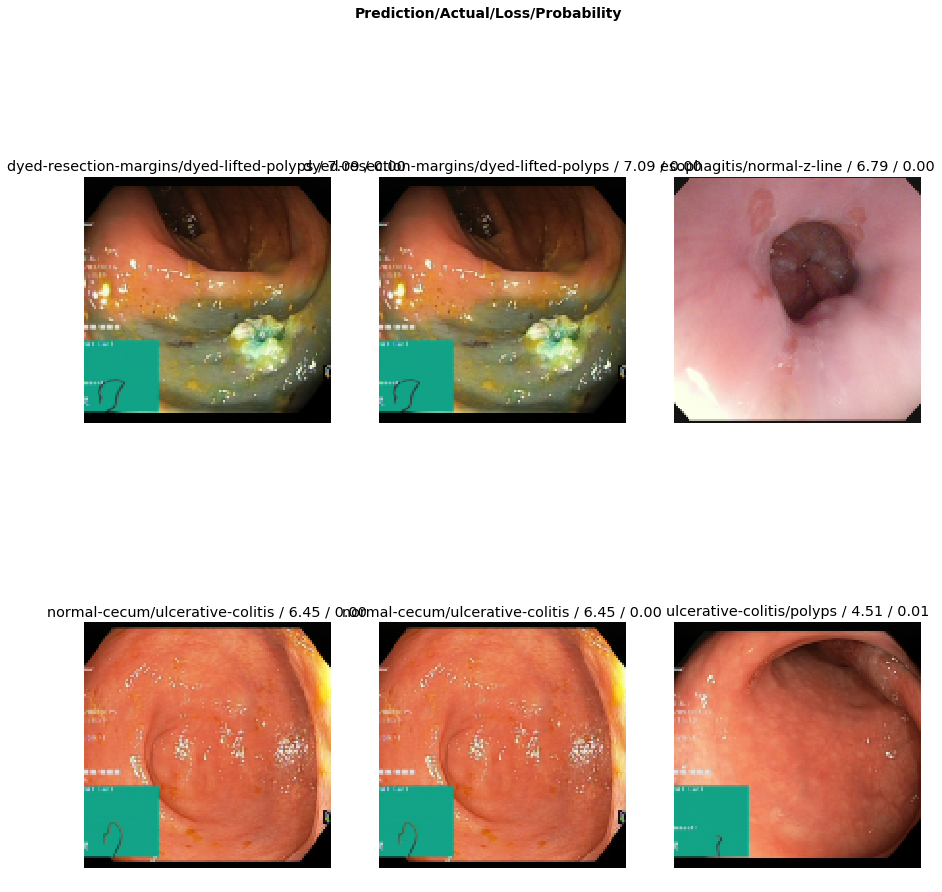

In [ ]:
interpreter.plot_top_losses(6, figsize=(15,15), heatmap = False)

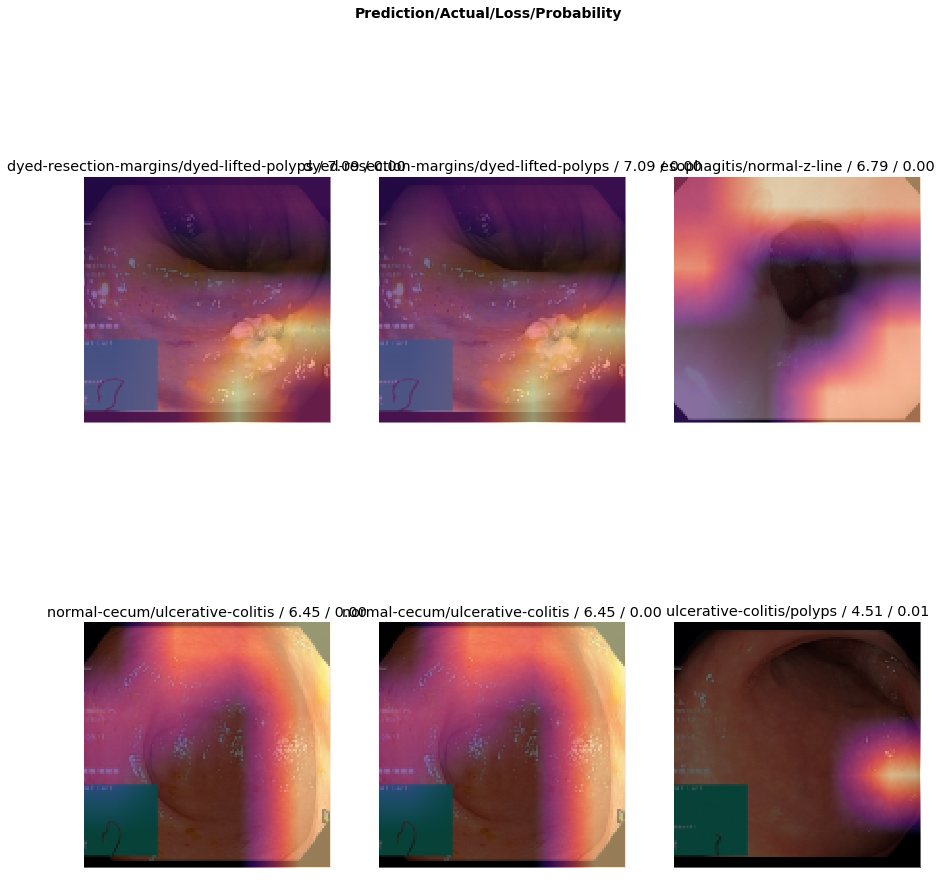

In [ ]:
interpreter.plot_top_losses(6, figsize=(15,15), heatmap = True)

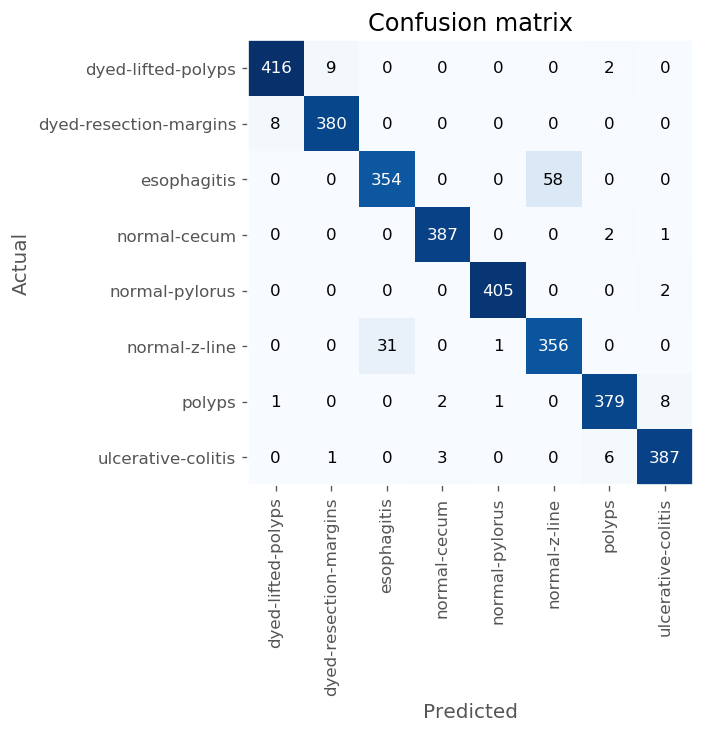

In [ ]:
interpreter.plot_confusion_matrix(figsize=(6,6), dpi=120)